In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train =pd.read_csv("/content/drive/MyDrive/Prodigy/Task-3/bank-full.csv",sep=';')
test =pd.read_csv("/content/drive/MyDrive/Prodigy/Task-3/bank.csv",sep=';')

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
train.shape

(45211, 17)

In [7]:
test.shape

(4521, 17)

In [8]:
train["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
train["age"].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [10]:
train['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

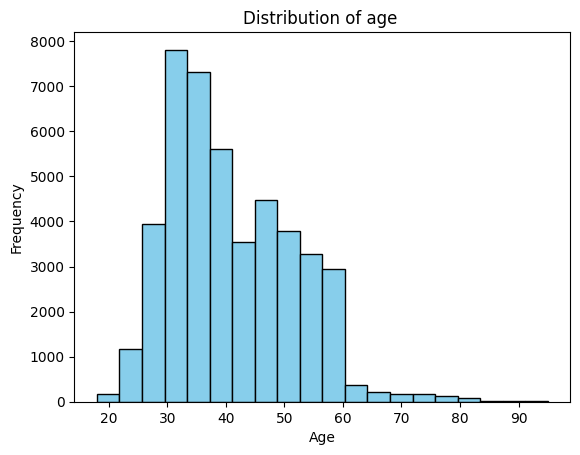

In [11]:
plt.hist(train['age'], bins=20,color='skyblue',edgecolor='black')
plt.title("Distribution of age ")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

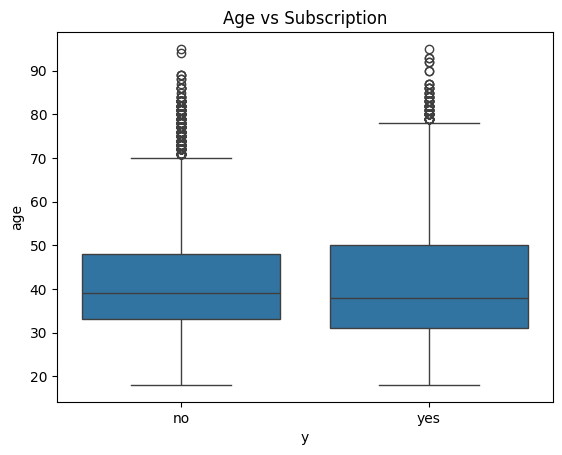

In [12]:
sns.boxplot(x="y",y="age",data=train)
plt.title("Age vs Subscription")
plt.show()

In [13]:
bins = [18,30,40,50,60,100]
labels = ['18-29','30-39', '40-49','50-59','60+']

train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)

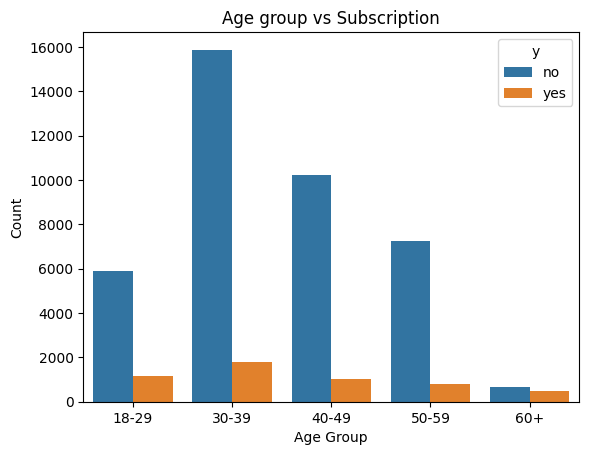

In [14]:
sns.countplot(x='age_group', hue='y',data=train)
plt.title("Age group vs Subscription")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

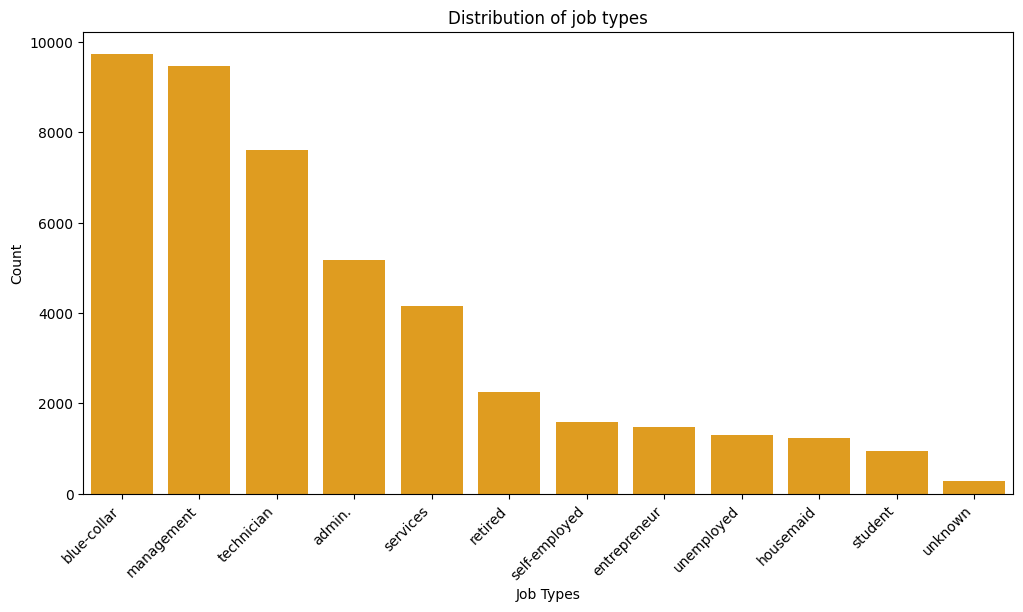

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', data=train, order=train['job'].value_counts().index,color='orange')
plt.title("Distribution of job types")
plt.xlabel('Job Types')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

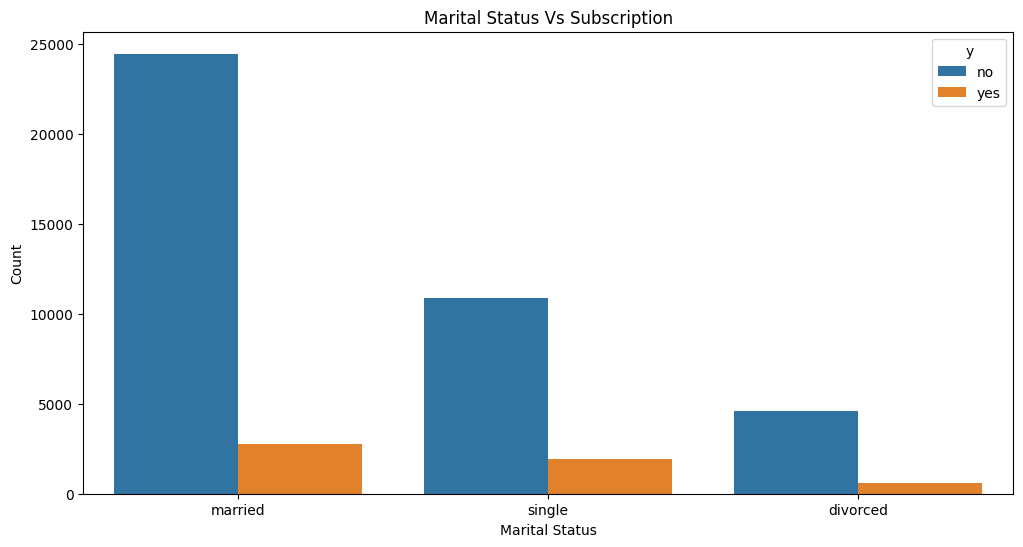

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital',hue='y',data=train,order=train['marital'].value_counts().index)
plt.title("Marital Status Vs Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

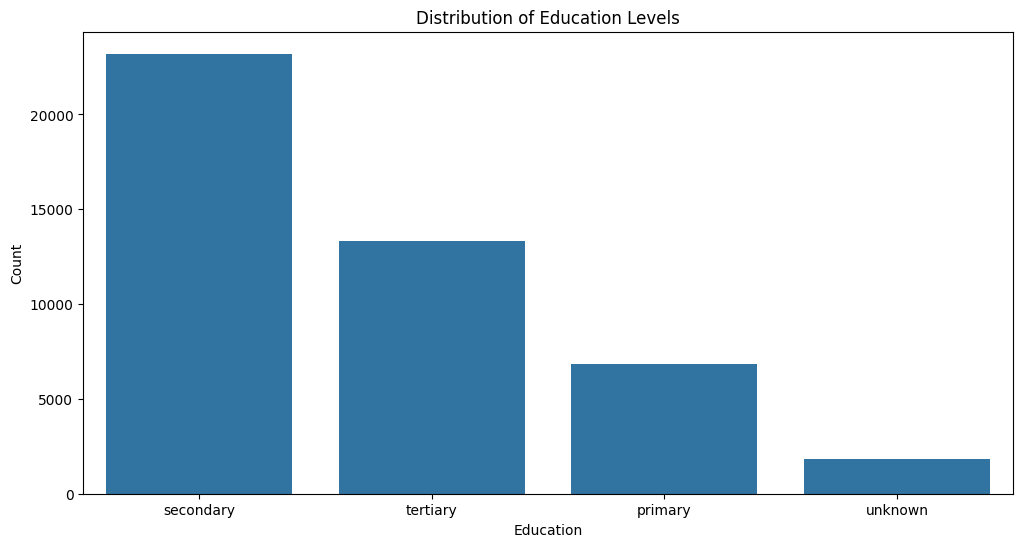

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='education', data=train,order=train['education'].value_counts().index)
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

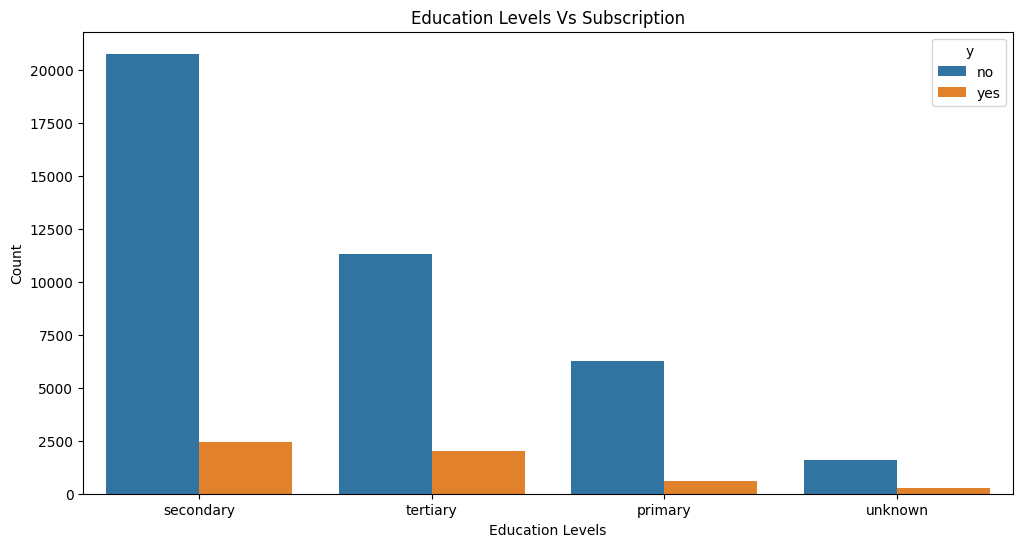

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='education',hue='y', data=train, order=train['education'].value_counts().index)
plt.title("Education Levels Vs Subscription")
plt.xlabel("Education Levels")
plt.ylabel("Count")
plt.show()

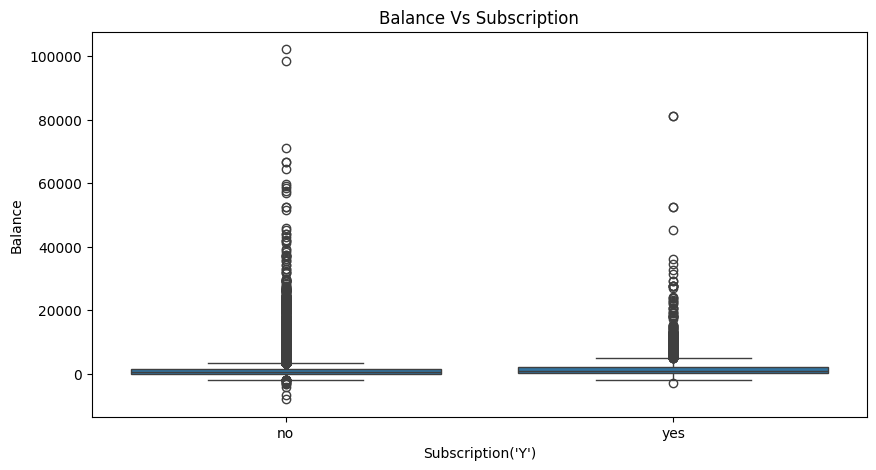

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='balance',data=train)
plt.title("Balance Vs Subscription")
plt.xlabel("Subscription('Y')")
plt.ylabel("Balance")
plt.show()

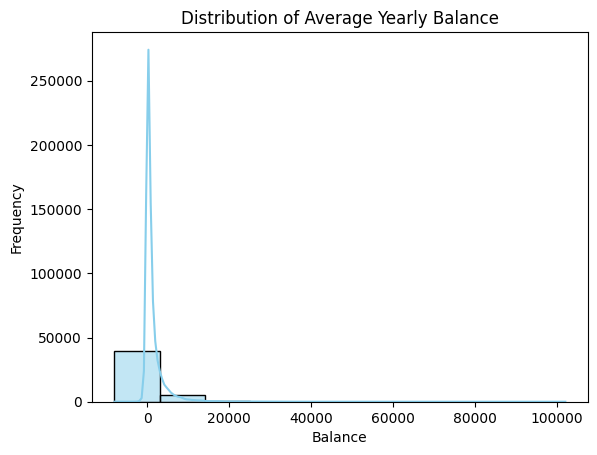

In [39]:
sns.histplot(train['balance'],color='skyblue',edgecolor='black',bins=10,kde=True)
plt.title("Distribution of Average Yearly Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

In [43]:
train['balance_category'] =(train['balance'] <= 10000).astype(int)
print(train[['balance','balance_category']].head(10))

   balance  balance_category
0     2143                 1
1       29                 1
2        2                 1
3     1506                 1
4        1                 1
5      231                 1
6      447                 1
7        2                 1
8      121                 1
9      593                 1


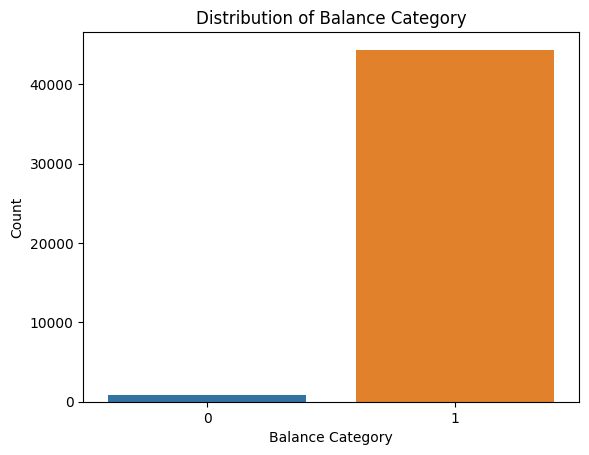

In [46]:
sns.countplot(x='balance_category',data=train,hue='balance_category',legend=False)
plt.title("Distribution of Balance Category")
plt.xlabel("Balance Category")
plt.ylabel("Count")
plt.legend
plt.show()

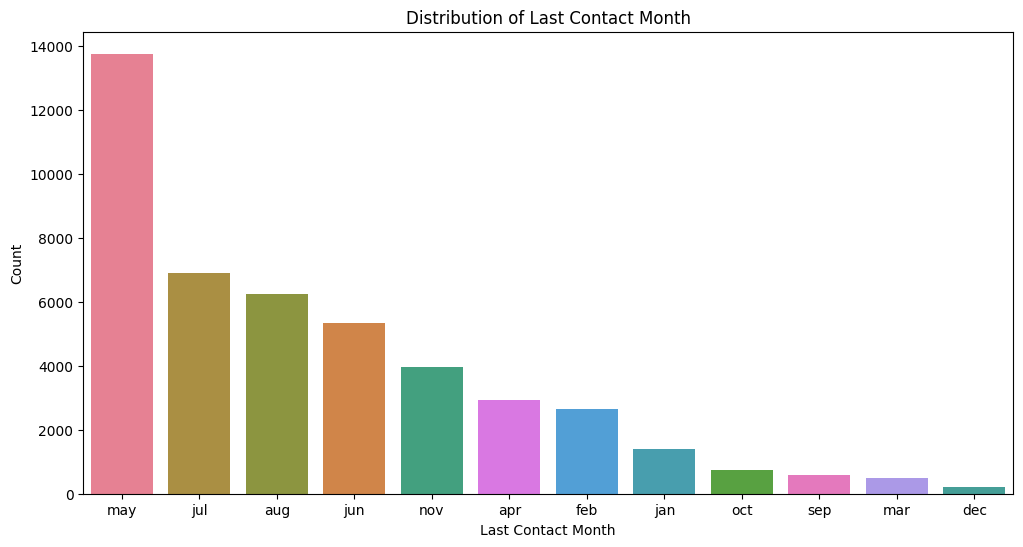

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=train,order=train['month'].value_counts().index,hue='month')
plt.title("Distribution of Last Contact Month")
plt.xlabel("Last Contact Month")
plt.ylabel("Count")
plt.show()


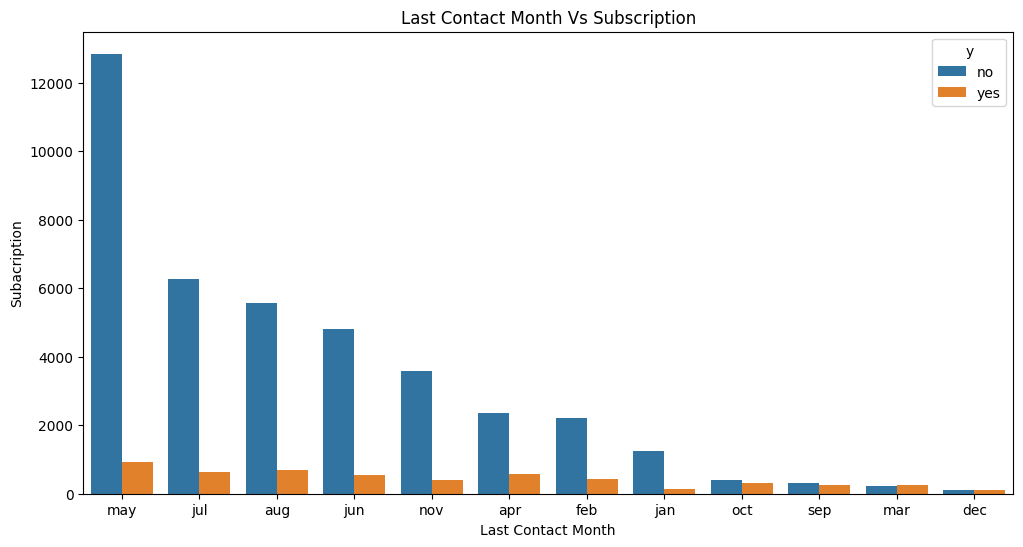

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='y', data=train, order=train['month'].value_counts().index)
plt.title("Last Contact Month Vs Subscription")
plt.xlabel("Last Contact Month")
plt.ylabel("Subacription")
plt.show()

Encoding


In [54]:
temp_train=train.copy()

In [55]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                45211 non-null  int64   
 1   job                45211 non-null  object  
 2   marital            45211 non-null  object  
 3   education          45211 non-null  object  
 4   default            45211 non-null  object  
 5   balance            45211 non-null  int64   
 6   housing            45211 non-null  object  
 7   loan               45211 non-null  object  
 8   contact            45211 non-null  object  
 9   day                45211 non-null  int64   
 10  month              45211 non-null  object  
 11  duration           45211 non-null  int64   
 12  campaign           45211 non-null  int64   
 13  pdays              45211 non-null  int64   
 14  previous           45211 non-null  int64   
 15  poutcome           45211 non-null  object  
 16  y   

In [57]:
temp_train.drop(columns = ['day','duration','previous','age','balance','campaign','pdays'],inplace = True)

In [58]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                45211 non-null  object  
 1   marital            45211 non-null  object  
 2   education          45211 non-null  object  
 3   default            45211 non-null  object  
 4   housing            45211 non-null  object  
 5   loan               45211 non-null  object  
 6   contact            45211 non-null  object  
 7   month              45211 non-null  object  
 8   poutcome           45211 non-null  object  
 9   y                  45211 non-null  object  
 10  age_group          45199 non-null  category
 11  balance_categoory  45211 non-null  int64   
 12  balance_category   45211 non-null  int64   
dtypes: category(1), int64(2), object(10)
memory usage: 4.2+ MB


In [59]:
temp_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_group,balance_categoory,balance_category
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,50-59,0,1
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,40-49,0,1
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,30-39,0,1
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,40-49,0,1
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,30-39,0,1


In [61]:
temp_train = pd.get_dummies(temp_train,columns = ['job','marital','education','contact','poutcome','age_group'],drop_first = True)


In [62]:
temp_train.head()

,default,housing,loan,month,y,balance_categoory,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,no,yes,no,may,no,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,no,yes,no,may,no,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,no,yes,yes,may,no,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
3,no,yes,no,may,no,0,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
4,no,no,no,may,no,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [63]:
temp_train.drop(columns=['month'], inplace=True)

In [64]:
temp_train.head()

,default,housing,loan,y,balance_categoory,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,no,yes,no,no,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,no,yes,no,no,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,no,yes,yes,no,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,no,yes,no,no,0,1,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,no,no,no,no,0,1,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0


In [65]:
temp_train.replace({'yes': 1, 'no': 0, True: 1, False: 0}, inplace=True)

In [66]:
temp_train

,default,housing,loan,y,balance_categoory,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45207,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45208,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45209,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


MODEL BUILDING

In [68]:
x = temp_train.drop('y', axis=1)
y = temp_train['y']

In [73]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()


In [75]:
classifier.fit(x_train, y_train)



DecisionTreeClassifier()

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score



In [78]:
accuracy_score(y_pred,y_test)

0.884662169633971